<a href="https://colab.research.google.com/github/qwerqc/2024-1-my-BDA/blob/main/inclass/04w_0326_tue_ch06_dataframe_handling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **빅데이터 분석 프로그래밍**

# 파이썬 설치 확인

In [1]:
import site
site.getsitepackages()

['/usr/local/lib/python3.10/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.10/dist-packages']

In [2]:
import sys
import pandas as pd
import numpy as np

print(sys.version)
print(pd.__version__)
print(np.__version__)

3.10.12 (main, Nov 20 2023, 15:14:05) [GCC 11.4.0]
1.5.3
1.25.2


# 코랩에서 한글 처리

In [3]:
!pip install koreanize_matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 21.4 MB/s eta 0:00:00


In [4]:
# 그림 선명하게
%config InlineBackend.figure_format = 'retina'

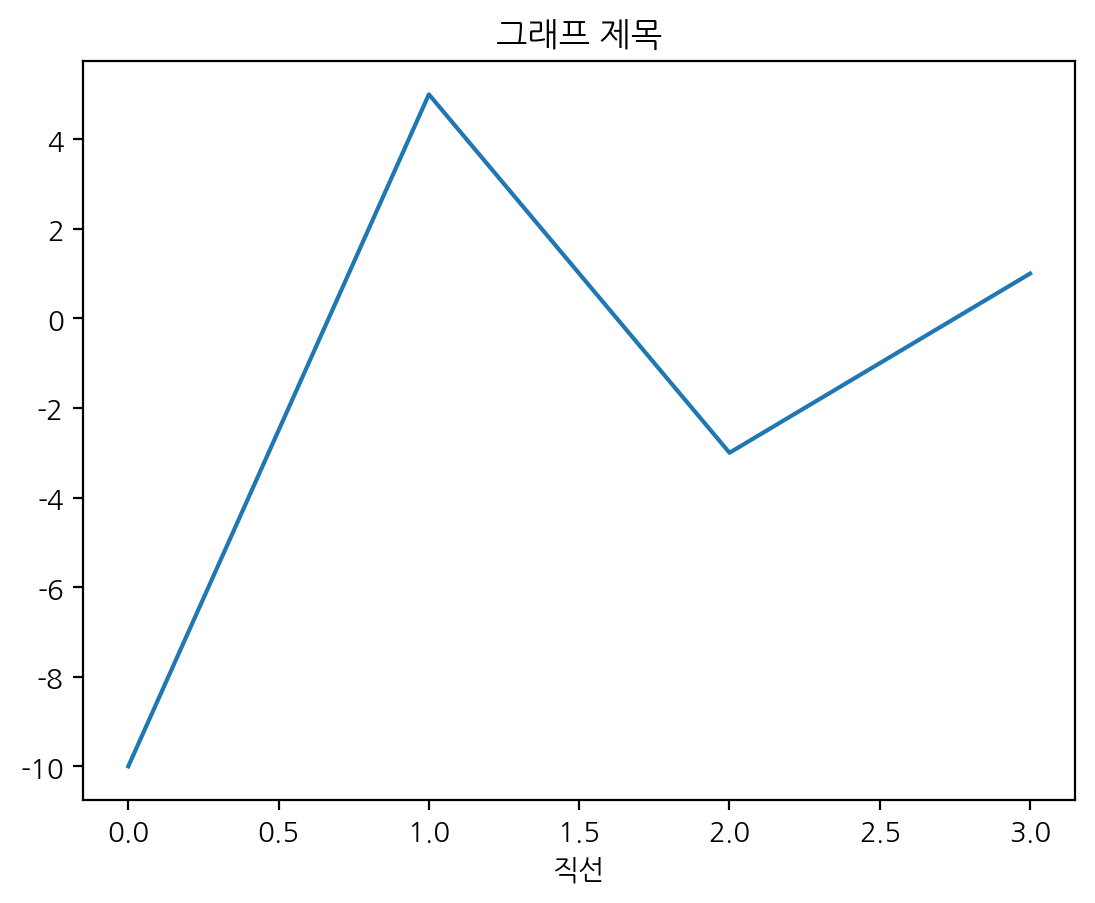

In [6]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.plot([-10, 5, -3, 1])
plt.title('그래프 제목')
plt.xlabel('직선')
plt.show()

## 수업에서 사용할 데이터를 다음 깃에서 복사
- https://github.com/ai7dnn/data.git
수업에서 파일 사용 시
- 현재 하부 폴더 data
- 파일 data/파일이름

In [7]:
!git clone https://github.com/ai7dnn/data.git


Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (23/23), done.
remote: Total 24 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (24/24), 4.00 MiB | 6.37 MiB/s, done.


In [8]:
import pandas as pd
exam = pd.read_csv('data/exam.csv')
exam.head()

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65


In [16]:
exam.sample(5)

,id,nclass,math,english,science
4,5,2,25,80,65
11,12,3,45,85,32
5,6,2,50,89,98
12,13,4,46,98,65
7,8,2,90,78,25


In [38]:
exam.query('nclass == 1')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [40]:
exam['nclass'] == 1

0      True
1      True
2      True
3      True
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
Name: nclass, dtype: bool

In [39]:
exam[exam['nclass'] == 1]

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58


In [18]:
# 2반인 경우만 추출
exam.query('nclass == 2')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [20]:
# 수학 점수가 50을 초과한 경우
exam.query('math > 50')

,id,nclass,math,english,science
1,2,1,60,97,60
6,7,2,80,90,45
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
15,16,4,58,98,65
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87
19,20,5,78,83,58


In [21]:
# 영어 점수가 80점 이하는 경우
exam.query('english <= 80')

,id,nclass,math,english,science
4,5,2,25,80,65
7,8,2,90,78,25
10,11,3,65,65,65
14,15,4,75,56,78
16,17,5,65,68,98
17,18,5,80,78,90
18,19,5,89,68,87


In [27]:
# 1반이면서 수학 점수가 50점 이상인 경우
exam.query('nclass == 1 & math >= 50')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60


In [29]:
# 2반이면서 영어 점수가 80점 이상인 경우
exam.query('nclass == 2 & english >= 80')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45


In [30]:
# 수학 점수가 90점 이상이거나 영어 점수가 90점 이상인 경우
exam.query('math >= 90 | english >= 90')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
3,4,1,30,98,58
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
12,13,4,46,98,65
15,16,4,58,98,65


In [35]:
# 1, 3, 5반에 해당하면 추출
exam.query('nclass == (1, 3 ,5)')

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [37]:
# 1, 3, 5반에 해당하면 추출
exam.query('nclass in [1, 3 ,5]') # 시험 예상

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [45]:
exam[exam['nclass'].isin([1, 3, 5])] # 시험 예상

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
3,4,1,30,98,58
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32
16,17,5,65,68,98
17,18,5,80,78,90


In [52]:
exam[["nclass", 'math']]

,nclass,math
0,1,50
1,1,60
2,1,45
3,1,30
4,2,25
5,2,50
6,2,80
7,2,90
8,3,20
9,3,50


In [47]:
type(exam['nclass'])

pandas.core.series.Series

In [50]:
type(exam[['nclass']])

pandas.core.frame.DataFrame

## 추출한 행으로 데이터 만들기

In [53]:
# nclass가 1인 행 추출해 nclass1에 할당
nclass1 = exam.query('nclass == 1')

# nclass가 2인 행 추출해 nclass2에 할당
nclass2 = exam.query('nclass == 2')

In [54]:
nclass1['math'].mean()

46.25

In [56]:
nclass1['math'].sum()

185

In [58]:
nclass1.math.sum()

185

In [59]:
# nclass가 1인 행 추출해 nclass1에 할당
nclass1 = exam[exam.nclass == 1]

# nclass가 2인 행 추출해 nclass2에 할당
nclass2 = exam[exam.nclass == 2]


In [62]:
# 2반 과학 점수 평균 구하기
nclass2.science.mean()

58.25

### 문자 변수를 이용해 조건에 맞는 행 추출하기

In [63]:
df = pd.DataFrame({'sex' : ['F', 'M', 'F', 'M'],
                   'country' : ['Korea', 'China', 'Japan', 'USA']})
df

,sex,country
0,F,Korea
1,M,China
2,F,Japan
3,M,USA


In [64]:
# 전체 조건에 큰따옴표, 추출할 문자에 작은따옴표 사용
df.query("sex == 'F' & country == 'Korea'")

,sex,country
0,F,Korea


In [70]:
# 전체 조건에 작은따옴표, 추출할 문자에 큰따옴표 사용
df.query('sex == "F" & country == "Korea"')

,sex,country
0,F,Korea


###(알아 두면 좋아요) 외부 변수 이용해 추출하기

In [68]:
var = 2
exam.query('nclass == @var')

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


In [69]:
exam[exam.nclass == var]

,id,nclass,math,english,science
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25


## 메소드 df.isin()

In [71]:
df = pd.DataFrame({'num_legs': [2, 4], 'num_wings': [2, 0]},
                  index=['falcon', 'dog'])
df


,num_legs,num_wings
falcon,2,2
dog,4,0


In [185]:
df.isin([0]) # list나 dict 형태

,num_legs,num_wings
falcon,False,False
dog,False,True


In [188]:
df.isin([0, 2])

,num_legs,num_wings
falcon,True,True
dog,False,True


In [187]:
~df.isin([0, 2])

,num_legs,num_wings
falcon,False,False
dog,True,False


In [189]:
df.isin({'num_wings': [0, 3]})

,num_legs,num_wings
falcon,False,False
dog,False,True


In [191]:
other = pd.DataFrame({'num_legs': [8, 3], 'num_wings': [0, 2]},
                     index=['spider', 'falcon'])
other

,num_legs,num_wings
spider,8,0
falcon,3,2


In [192]:
df.isin(other)

,num_legs,num_wings
falcon,False,True
dog,False,False


In [193]:
s = pd.Series(['llama', 'cow', 'llama', 'beetle', 'llama',
               'hippo'], name='animal')
s.isin(['cow', 'llama'])

0     True
1     True
2     True
3    False
4     True
5    False
Name: animal, dtype: bool

In [194]:
pd.Series([1]).isin(['1'])
pd.Series([1.1]).isin(['1.1'])

0    False
dtype: bool

In [200]:
pd.Series([1]).isin([1])
pd.Series([1.1]).isin([1.1])

0    True
dtype: bool

## 06-3 필요한 변수만 추출하기

In [75]:
exam['math'] # math 추출

0     50
1     60
2     45
3     30
4     25
5     50
6     80
7     90
8     20
9     50
10    65
11    45
12    46
13    48
14    75
15    58
16    65
17    80
18    89
19    78
Name: math, dtype: int64

In [77]:
exam[['english']]

,english
0,98
1,97
2,86
3,98
4,80
5,89
6,90
7,78
8,98
9,98


In [78]:
exam.english

0     98
1     97
2     86
3     98
4     80
5     89
6     90
7     78
8     98
9     98
10    65
11    85
12    98
13    87
14    56
15    98
16    68
17    78
18    68
19    83
Name: english, dtype: int64

In [80]:
exam.sample(3)

,id,nclass,math,english,science
1,2,1,60,97,60
19,20,5,78,83,58
18,19,5,89,68,87


In [81]:
exam.columns

Index(['id', 'nclass', 'math', 'english', 'science'], dtype='object')

In [83]:
exam.columns[3]

'english'

In [86]:
exam[[exam.columns[3]]]

,english
0,98
1,97
2,86
3,98
4,80
5,89
6,90
7,78
8,98
9,98


In [87]:
exam.columns[1:3]

Index(['nclass', 'math'], dtype='object')

In [88]:
exam[exam.columns[1:3]]

,nclass,math
0,1,50
1,1,60
2,1,45
3,1,30
4,2,25
5,2,50
6,2,80
7,2,90
8,3,20
9,3,50


In [89]:
exam[['nclass', 'math', 'english']]

,nclass,math,english
0,1,50,98
1,1,60,97
2,1,45,86
3,1,30,98
4,2,25,80
5,2,50,89
6,2,80,90
7,2,90,78
8,3,20,98
9,3,50,98


### 행과 변수(열) 제거하기

In [90]:
exam.sample(3)

,id,nclass,math,english,science
16,17,5,65,68,98
14,15,4,75,56,78
17,18,5,80,78,90


In [91]:
exam.drop(1)

,id,nclass,math,english,science
0,1,1,50,98,50
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65


In [93]:
exam.drop([1, 5])

,id,nclass,math,english,science
0,1,1,50,98,50
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


In [98]:
exam.drop(labels=[1, 5], axis=0)

,id,nclass,math,english,science
0,1,1,50,98,50
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


In [99]:
exam.drop(labels=1,axis=0)

,id,nclass,math,english,science
0,1,1,50,98,50
2,3,1,45,86,78
3,4,1,30,98,58
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65


In [110]:
exam.drop(labels='nclass', axis=1)

,id,math,english,science
0,1,50,98,50
1,2,60,97,60
2,3,45,86,78
3,4,30,98,58
4,5,25,80,65
5,6,50,89,98
6,7,80,90,45
7,8,90,78,25
8,9,20,98,15
9,10,50,98,45


In [104]:
exam.drop(['nclass','english'], axis=1) # 여러 열 삭제

,id,math,science
0,1,50,50
1,2,60,60
2,3,45,78
3,4,30,58
4,5,25,65
5,6,50,98
6,7,80,45
7,8,90,25
8,9,20,15
9,10,50,45


In [105]:
exam.drop(index=3)

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65


In [111]:
exam.drop(columns=['math', 'science'])


,id,nclass,english
0,1,1,98
1,2,1,97
2,3,1,86
3,4,1,98
4,5,2,80
5,6,2,89
6,7,2,90
7,8,2,78
8,9,3,98
9,10,3,98


In [112]:
exam.drop(index=[3,5])

,id,nclass,math,english,science
0,1,1,50,98,50
1,2,1,60,97,60
2,3,1,45,86,78
4,5,2,25,80,65
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
9,10,3,50,98,45
10,11,3,65,65,65
11,12,3,45,85,32


## pandas 함수 조합하기

In [115]:
# nclass가 1인 행만 추출한 다음 english 추출
exam.query('nclass == 1')[['english']]

,english
0,98
1,97
2,86
3,98


In [119]:
# math가 50 이상인 행만 추출한 다음 id, math 추출
exam.query('math >= 50')[['id', 'math']]


,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


In [121]:
exam.query('math >= 50')[['id', 'math']].tail(3)

,id,math
17,18,80
18,19,89
19,20,78


In [123]:
exam.query('math >= 50')[['id', 'math']].sample(frac=.4)


,id,math
10,11,65
0,1,50
18,19,89
1,2,60
19,20,78


## 가독성 있게 코드 줄 바꾸기

In [125]:
# math가 50 이상인 행만 추출
# id, math 추출
# 앞부분 10행 추출
exam.query('math >= 50')[['id', 'math']].head(10)
exam.query('math >= 50') \
          [['id', 'math']] \
          .head(10)

,id,math
0,1,50
1,2,60
5,6,50
6,7,80
7,8,90
9,10,50
10,11,65
14,15,75
15,16,58
16,17,65


In [126]:
exam.query('math >= 50 & english >= 80') \
          [['id', 'math', 'english']].head(10)

,id,math,english
0,1,50,98
1,2,60,97
5,6,50,89
6,7,80,90
9,10,50,98
15,16,58,98
19,20,78,83


## 06-4 순서대로 정렬하기

In [127]:
# math 오름차순 정렬
exam.sort_values("math")

,id,nclass,math,english,science
8,9,3,20,98,15
4,5,2,25,80,65
3,4,1,30,98,58
2,3,1,45,86,78
11,12,3,45,85,32
12,13,4,46,98,65
13,14,4,48,87,12
0,1,1,50,98,50
9,10,3,50,98,45
5,6,2,50,89,98


In [128]:
# math 내림차순 정렬
exam.sort_values("math", ascending=False)

,id,nclass,math,english,science
7,8,2,90,78,25
18,19,5,89,68,87
17,18,5,80,78,90
6,7,2,80,90,45
19,20,5,78,83,58
14,15,4,75,56,78
16,17,5,65,68,98
10,11,3,65,65,65
1,2,1,60,97,60
15,16,4,58,98,65


In [136]:
# nclass, math 오름차순 정렬
exam.sort_values(["nclass", "math"])

,id,nclass,math,english,science
3,4,1,30,98,58
2,3,1,45,86,78
0,1,1,50,98,50
1,2,1,60,97,60
4,5,2,25,80,65
5,6,2,50,89,98
6,7,2,80,90,45
7,8,2,90,78,25
8,9,3,20,98,15
11,12,3,45,85,32


In [139]:
# nclass, math 모두 내림차순 정렬
exam.sort_values(["nclass", "math"], ascending=False)

,id,nclass,math,english,science
18,19,5,89,68,87
17,18,5,80,78,90
19,20,5,78,83,58
16,17,5,65,68,98
14,15,4,75,56,78
15,16,4,58,98,65
13,14,4,48,87,12
12,13,4,46,98,65
10,11,3,65,65,65
9,10,3,50,98,45


In [138]:
# nclass 오름차순, math 내림차순 정렬
exam.sort_values(["nclass", "math"], ascending = [True, False])

,id,nclass,math,english,science
1,2,1,60,97,60
0,1,1,50,98,50
2,3,1,45,86,78
3,4,1,30,98,58
7,8,2,90,78,25
6,7,2,80,90,45
5,6,2,50,89,98
4,5,2,25,80,65
10,11,3,65,65,65
9,10,3,50,98,45


## 06-5 파생변수 추가하기

In [144]:
# total 변수 추가
exam.assign(total = exam['math'] + exam['english'] + exam['science'])

,id,nclass,math,english,science,total
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209
3,4,1,30,98,58,186
4,5,2,25,80,65,170
5,6,2,50,89,98,237
6,7,2,80,90,45,215
7,8,2,90,78,25,193
8,9,3,20,98,15,133
9,10,3,50,98,45,193


In [146]:
exam.sample(4)

,id,nclass,math,english,science
11,12,3,45,85,32
10,11,3,65,65,65
5,6,2,50,89,98
8,9,3,20,98,15


In [149]:
# total 변수 추가
exam["total"] = exam['math'] + exam['english'] + exam['science']

exam.sample(3) # 반영

,id,nclass,math,english,science,total
6,7,2,80,90,45,215
7,8,2,90,78,25,193
11,12,3,45,85,32,162


## 06-5 여러 파생변수 한 번에 추가하기

In [152]:
exam.assign(total = exam["math"] + exam["english"] + exam["science"], # total 추가
            mean = (exam["math"] + exam["english"] + exam["science"]) / 3) # mean 추가

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.000000
1,2,1,60,97,60,217,72.333333
2,3,1,45,86,78,209,69.666667
3,4,1,30,98,58,186,62.000000
4,5,2,25,80,65,170,56.666667
5,6,2,50,89,98,237,79.000000
6,7,2,80,90,45,215,71.666667
7,8,2,90,78,25,193,64.333333
8,9,3,20,98,15,133,44.333333
9,10,3,50,98,45,193,64.333333


### df.assign()에 np.where() 적용하기

In [153]:
import pandas as pd
exam = pd.read_csv('data/exam.csv')

In [154]:
import numpy as np
exam.assign(test = np.where(exam['science'] >= 60, 'pass', 'fail'))

,id,nclass,math,english,science,test
0,1,1,50,98,50,fail
1,2,1,60,97,60,pass
2,3,1,45,86,78,pass
3,4,1,30,98,58,fail
4,5,2,25,80,65,pass
5,6,2,50,89,98,pass
6,7,2,80,90,45,fail
7,8,2,90,78,25,fail
8,9,3,20,98,15,fail
9,10,3,50,98,45,fail


### 추가한 변수를 `pandas` 함수에 바로 활용하기

In [155]:
# total 변수 추가
# total 기준 정렬
exam.assign(total = exam['math'] + exam['english'] + exam['science']).sort_values('total')

,id,nclass,math,english,science,total
8,9,3,20,98,15,133
13,14,4,48,87,12,147
11,12,3,45,85,32,162
4,5,2,25,80,65,170
3,4,1,30,98,58,186
9,10,3,50,98,45,193
7,8,2,90,78,25,193
10,11,3,65,65,65,195
0,1,1,50,98,50,198
2,3,1,45,86,78,209


### `lambda` 이용해 데이터프레임명 줄여 쓰기

In [158]:
# 긴 데이터 프레임명 지정
long_name = pd.read_csv('data/exam.csv')

# long_name 직접 입력
long_name.assign(new = long_name['math'] + long_name['english'] + long_name['science'])

,id,nclass,math,english,science,new
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209
3,4,1,30,98,58,186
4,5,2,25,80,65,170
5,6,2,50,89,98,237
6,7,2,80,90,45,215
7,8,2,90,78,25,193
8,9,3,20,98,15,133
9,10,3,50,98,45,193


In [160]:
(lambda x, y : x + y)(10, 20)

30

In [162]:
fn = lambda x, y : x + y
fn(10, 20)

30

In [159]:
# long_name 대신 x 입력

long_name.assign(new = lambda x: x['math'] + x['english'] + x['science'])

,id,nclass,math,english,science,new
0,1,1,50,98,50,198
1,2,1,60,97,60,217
2,3,1,45,86,78,209
3,4,1,30,98,58,186
4,5,2,25,80,65,170
5,6,2,50,89,98,237
6,7,2,80,90,45,215
7,8,2,90,78,25,193
8,9,3,20,98,15,133
9,10,3,50,98,45,193


### 앞에서 만든 변수를 활용해 다시 변수 만들기

In [163]:
exam.assign(total = exam['math'] + exam['english'] + exam['science'],
            mean = lambda x: round(x['total'] / 3, 2))

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.00
1,2,1,60,97,60,217,72.33
2,3,1,45,86,78,209,69.67
3,4,1,30,98,58,186,62.00
4,5,2,25,80,65,170,56.67
5,6,2,50,89,98,237,79.00
6,7,2,80,90,45,215,71.67
7,8,2,90,78,25,193,64.33
8,9,3,20,98,15,133,44.33
9,10,3,50,98,45,193,64.33


In [166]:
data = 1.125456
round(data, 2)

1.13

In [172]:
exam.assign(total = lambda x: x['math'] + x['english'] + x['science'],
             mean = lambda x: x['total'] / 3)

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.000000
1,2,1,60,97,60,217,72.333333
2,3,1,45,86,78,209,69.666667
3,4,1,30,98,58,186,62.000000
4,5,2,25,80,65,170,56.666667
5,6,2,50,89,98,237,79.000000
6,7,2,80,90,45,215,71.666667
7,8,2,90,78,25,193,64.333333
8,9,3,20,98,15,133,44.333333
9,10,3,50,98,45,193,64.333333


In [168]:
exam.assign(total = lambda x: x['math'] + x['english'] + x['science'],
            mean = lambda x: round(x['total'] / 3, 3))

,id,nclass,math,english,science,total,mean
0,1,1,50,98,50,198,66.000
1,2,1,60,97,60,217,72.333
2,3,1,45,86,78,209,69.667
3,4,1,30,98,58,186,62.000
4,5,2,25,80,65,170,56.667
5,6,2,50,89,98,237,79.000
6,7,2,80,90,45,215,71.667
7,8,2,90,78,25,193,64.333
8,9,3,20,98,15,133,44.333
9,10,3,50,98,45,193,64.333


In [175]:
exam.assign(total = exam['math'] + exam['english'] + exam['science'],
            mean = exam['total'] / 3) # 오류 발생

KeyError: 'total'

# **학습내용 요약**

In [183]:
## 1. 조건에 맞는 데이터만 추출하기
exam.query('english <= 80')

# 여러 조건 동시 충족
exam.query('nclass == 1 & math >= 50')

# 여러 조건 중 하나 이상 충족
exam.query('math >= 90 | english >= 90')
exam.query('nclass in [1, 3, 5]')


## 2. 필요한 변수만 추출하기
exam['math']                                 # 한 변수 추출
exam[['nclass', 'math', 'english']]          # 여러 변수 추출
exam.drop(columns = 'math')                  # 변수 제거
exam.drop(columns = ['math', 'english'])     # 여러 변수 제거


## 3. pandas 명령어 조합하기
exam.query('math >= 50')[['id', 'math']].head()


## 4. 순서대로 정렬하기
exam.sort_values('math')                     # 오름차순 정렬
exam.sort_values('math', ascending = False)  # 내림차순 정렬

# 여러 변수 기준 정렬
exam.sort_values(['nclass', 'math'], ascending = [True, False])


## 5. 파생변수 추가하기
exam.assign(total = exam['math'] + exam['english'] + exam['science'])

# 여러 파생변수 한 번에 추가하기
exam.assign(total = exam['math'] + exam['english'] + exam['science'],
            mean = (exam['math'] + exam['english'] + exam['science']) / 3)

# assign()에 np.where() 적용하기
exam.assign(test = np.where(exam['science'] >= 60, 'pass', 'fall'))

# 추가한 변수를 pandas 코드에 바로 활용하기
exam.assign(total = exam['math'] + exam['english'] + exam['science']) \
    .sort_values('total') \
    .head()

,id,nclass,math,english,science,total
8,9,3,20,98,15,133
13,14,4,48,87,12,147
11,12,3,45,85,32,162
4,5,2,25,80,65,170
3,4,1,30,98,58,186
